In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/meesho-orders/meesho ForwardReports.csv
/kaggle/input/meesho-orders/meesho Orders Aug.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Read data 
df=pd.read_csv('/kaggle/input/meesho-orders/meesho Orders Aug.csv')
df.head()

,Reason for Credit Entry,Sub Order No,Order Date,Customer State,Product Name,SKU,Size,Quantity,Supplier Listed Price (Incl. GST + Commission),Supplier Discounted Price (Incl GST and Commision)
0,DELIVERED,406826346276_1,2022-08-01,Rajasthan,FIVESTAR Georgette Lehengha Choli with Inner C...,6326,Semi Stitched,1,1910.0,1910.0
1,CANCELLED,216649987717_1,2022-08-02,Andhra Pradesh,Beautiful pure lakhnovi long kurta embroidery ...,Kb 201,XXL,1,1500.0,1500.0
2,DELIVERED,184970118893_1,2022-08-02,Karnataka,PARTY WEAR BEAUTIFUL LOOK FANCY EMBROIDERY AN...,hk 1446,Free Size,1,1561.0,1561.0
3,RTO_COMPLETE,916538974169_1,2022-08-02,Assam,FIVESTAR Designer Suit On Havy Gorgette febric...,1101 black,Semi Stitched,1,1749.0,1749.0
4,DELIVERED,528661643961_1,2022-08-02,West Bengal,stlish dress,mk -6114,XL,1,750.0,750.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Reason for Credit Entry                             208 non-null    object 
 1   Sub Order No                                        208 non-null    object 
 2   Order Date                                          208 non-null    object 
 3   Customer State                                      208 non-null    object 
 4   Product Name                                        208 non-null    object 
 5   SKU                                                 208 non-null    object 
 6   Size                                                208 non-null    object 
 7   Quantity                                            208 non-null    int64  
 8   Supplier Listed Price (Incl. GST + Commission)      208 non-null    float64
 9  

In [5]:
df.isnull().sum()#checking for missing values

Reason for Credit Entry                               0
Sub Order No                                          0
Order Date                                            0
Customer State                                        0
Product Name                                          0
SKU                                                   0
Size                                                  0
Quantity                                              0
Supplier Listed Price (Incl. GST + Commission)        0
Supplier Discounted Price (Incl GST and Commision)    0
dtype: int64

In [6]:
#Changing columns name
df.columns=['Status','Order_ID','Order_Date','State','Product_Name','SKU','Size','Quantity','Actual_price','Discount_Price']
df.head()

,Status,Order_ID,Order_Date,State,Product_Name,SKU,Size,Quantity,Actual_price,Discount_Price
0,DELIVERED,406826346276_1,2022-08-01,Rajasthan,FIVESTAR Georgette Lehengha Choli with Inner C...,6326,Semi Stitched,1,1910.0,1910.0
1,CANCELLED,216649987717_1,2022-08-02,Andhra Pradesh,Beautiful pure lakhnovi long kurta embroidery ...,Kb 201,XXL,1,1500.0,1500.0
2,DELIVERED,184970118893_1,2022-08-02,Karnataka,PARTY WEAR BEAUTIFUL LOOK FANCY EMBROIDERY AN...,hk 1446,Free Size,1,1561.0,1561.0
3,RTO_COMPLETE,916538974169_1,2022-08-02,Assam,FIVESTAR Designer Suit On Havy Gorgette febric...,1101 black,Semi Stitched,1,1749.0,1749.0
4,DELIVERED,528661643961_1,2022-08-02,West Bengal,stlish dress,mk -6114,XL,1,750.0,750.0


<Axes: xlabel='Status', ylabel='Actual_price'>

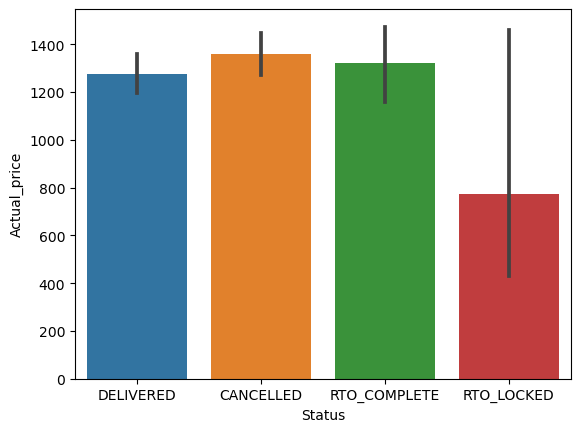

In [10]:
sns.barplot(data=df,x='Status',y='Actual_price')

([<matplotlib.patches.Wedge at 0x7c358c79d150>,
 [Text(0.5546733688532629, 0.9499144455607423, 'DELIVERED'),
  Text(-0.9164149559299116, -0.6084271760432619, 'CANCELLED'),
  Text(0.9741057455925929, -0.5109970610517236, 'RTO_COMPLETE'),
  Text(1.0996010671621546, -0.029622509951907676, 'RTO_LOCKED')],
 [Text(0.3025491102835979, 0.5181351521240412, '33.18%'),
  Text(-0.4998627032344972, -0.3318693687508701, '52.30%'),
  Text(0.5313304066868688, -0.27872566966457646, '13.66%'),
  Text(0.5997824002702661, -0.01615773270104055, '0.86%')])

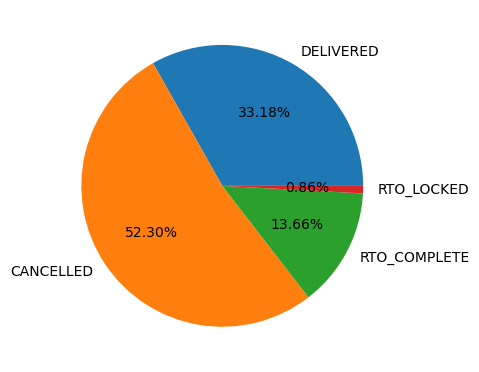

In [8]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.pie(df.groupby('Status')['Actual_price'].sum(),autopct="%0.2f%%",labels=df["Status"].unique())


In [11]:
status=df['Status'].unique()
status

array(['DELIVERED', 'CANCELLED', 'RTO_COMPLETE', 'RTO_LOCKED'],
      dtype=object)

In [12]:
status_df=df.groupby(['Status'])[['State']].count()
status_df.reset_index(inplace=True)
status_df.columns=['status','Total']
status_df.head()

,status,Total
0,CANCELLED,66
1,DELIVERED,111
2,RTO_COMPLETE,28
3,RTO_LOCKED,3


In [13]:
import plotly.graph_objects as go

In [14]:
state_df=df.groupby(['State'])[['Actual_price']].sum()
state_df.sort_values(['Actual_price'],ascending=False, inplace=True)
state_df

,Actual_price
State,
Uttar Pradesh,26294.0
Tamil Nadu,18471.0
West Bengal,17679.0
Telangana,14981.0
Odisha,14929.0
Bihar,13747.0
Jammu & Kashmir,13438.0
Madhya Pradesh,13350.0
Maharashtra,12967.0


In [15]:
fig=px.bar(df,x='State', y='Actual_price',title='Review of each state')
fig.show()

In [16]:
chart=px.pie(df,values='Actual_price',names='Size',title='Most selled size')
chart.show()

In [39]:
dfs=pd.read_csv('/kaggle/input/meesho-orders/meesho ForwardReports.csv')
dfs.head()

,order_date,sub_order_num,order_status,state,pin,gst_amount,meesho_price,shipping_charges_total,price
0,2022-08-30,381809810413_1,Shipped,Jammu & Kashmir,180006,66.68,1400,121,1521
1,2022-08-10,940712900368_1,rto,Uttar Pradesh,208014,69.58,1461,114,1575
2,2022-08-03,322259568161_1,Delivered,Telangana,509001,64.30,1350,108,1440
3,2022-08-27,475133679575_1,Cancelled,Jammu & Kashmir,182101,98.96,2078,0,2078
4,2022-08-04,493966375185_1,rto,Odisha,760001,64.30,1350,108,1458


In [42]:
dfs.columns=('Date','sub_order_no','Status','State','pin','GST','Price','Shipping_charge','total_price')
dfs.head()

,Date,sub_order_no,Status,State,pin,GST,Price,Shipping_charge,total_price
0,2022-08-30,381809810413_1,Shipped,Jammu & Kashmir,180006,66.68,1400,121,1521
1,2022-08-10,940712900368_1,rto,Uttar Pradesh,208014,69.58,1461,114,1575
2,2022-08-03,322259568161_1,Delivered,Telangana,509001,64.30,1350,108,1440
3,2022-08-27,475133679575_1,Cancelled,Jammu & Kashmir,182101,98.96,2078,0,2078
4,2022-08-04,493966375185_1,rto,Odisha,760001,64.30,1350,108,1458


In [44]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             138 non-null    object 
 1   sub_order_no     138 non-null    object 
 2   Status           138 non-null    object 
 3   State            138 non-null    object 
 4   pin              138 non-null    int64  
 5   GST              138 non-null    float64
 6   Price            138 non-null    int64  
 7   Shipping_charge  138 non-null    int64  
 8   total_price      138 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 9.8+ KB


In [43]:
anchos = [0.2] * 6
bar = go.Figure()
bar.add_trace(go.Bar(x = dfs['Status'],
                     y = dfs['GST'], 
                     width = anchos, name = 'GST'))
bar.add_trace(go.Bar(x = dfs['Status'],
                     y = dfs['Price'], 
                     width = anchos, name = 'Price'))
bar.add_trace(go.Bar(x = dfs['Status'],
                     y = dfs['Shipping_charge'], 
                     width = anchos, name = 'Shipping_charge'))
bar.add_trace(go.Bar(x = dfs['Status'],
                     y = dfs['total_price'], 
                     width = anchos, name = 'total_price'))



bar.update_layout(title =  "PRICE DETAILS",
                  barmode = 'group', title_font_size = 40)
bar.update_xaxes(title_text = 'Status')
bar.update_yaxes(title_text = "Total")

bar.show()

In [45]:
status=dfs['Status'].unique()
status

array(['Shipped', 'rto', 'Delivered', 'Cancelled', 'Return', 'Exchange'],
      dtype=object)

In [48]:
shipped = pd.DataFrame(dfs[dfs["Status"]=="Shipped"])
shipped
                           

,Date,sub_order_no,Status,State,pin,GST,Price,Shipping_charge,total_price
0,2022-08-30,381809810413_1,Shipped,Jammu & Kashmir,180006,66.68,1400,121,1521
10,2022-08-30,910483967612_1,Shipped,Assam,788164,24.72,519,0,519
12,2022-08-28,810704930357_1,Shipped,Jammu & Kashmir,182204,70.24,1475,0,1475
21,2022-08-30,796423327995_1,Shipped,Chhattisgarh,495671,65.14,1368,110,1478
23,2022-08-29,781373357372_1,Shipped,Bihar,848504,60.06,1261,114,1375
29,2022-08-31,507323371165_1,Shipped,Karnataka,560005,100.30,2106,0,2106
32,2022-08-25,120234205854_1,Shipped,Kerala,671533,24.20,508,0,508
35,2022-08-26,485706928032_1,Shipped,Andhra Pradesh,517520,23.48,493,0,493
51,2022-08-29,755828660648_1,Shipped,Kerala,671121,24.72,519,0,519
53,2022-08-25,963799194113_1,Shipped,Uttar Pradesh,285123,24.20,508,0,502


In [50]:
dfs["Date"] = pd.to_datetime(dfs["Date"])
shipped["Date"] = pd.to_datetime(shipped["Date"])
dfs["day_name"] = dfs["Date"].dt.day_name()
dfs["day"] = dfs["Date"].dt.day
shipped["day_name"] = shipped["Date"].dt.day_name()
shipped["day"] = shipped["Date"].dt.day

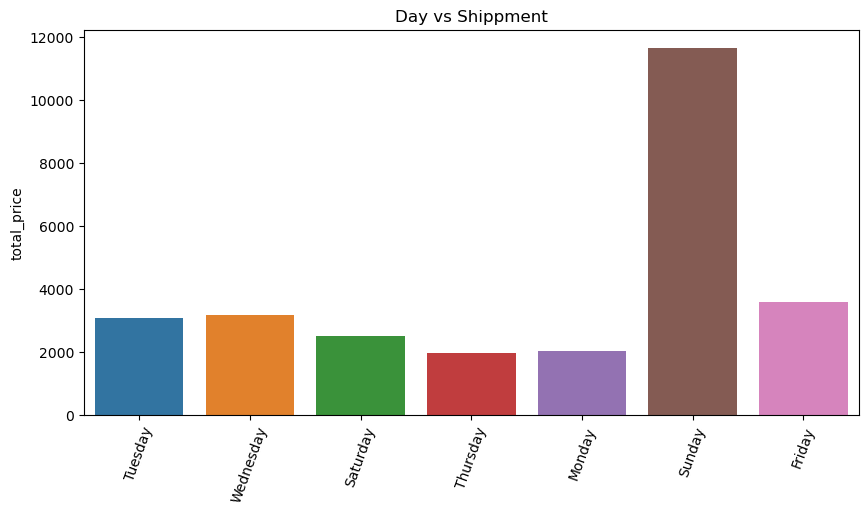

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(x=dfs["day_name"].unique() ,y = shipped.groupby("day_name")["total_price"].sum())
plt.title("Day vs Shippment")
plt.xticks(rotation=70)
plt.show()